In [25]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import numpy as np
import datetime
from os import listdir
from os.path import isfile, join

from matplotlib import gridspec
from matplotlib.backends.backend_pdf import PdfPages

percorso = 'D:/Università/Tirocinio/Analisi Dati/Studio Dati/'
cartella = 'risultati_terremoto/'
# percorso = 'D:/Tirocinio/programmi/Studio Dati/'

coms = pd.Series(pd.read_csv('D:/Università/Tirocinio/Analisi Dati/Grezzo Niki/sezione2comuneDEF.csv').comune.unique(),name='Comune')
# coms = pd.Series(pd.read_csv('D:/Tirocinio/programmi/Grezzo Niki/sezione2comuneDEF.csv').comune.unique(), name= 'Comune')
crateri = pd.read_csv('D:/Università/Tirocinio/Analisi Dati/Studio Dati/crateriCentroIT.csv', sep=';').merge(coms,how='outer').drop(columns='Provincia')
# crateri = pd.read_csv('D:/Tirocinio/programmi/Studio Dati/crateriCentroIT.csv', sep=';').merge(coms, how='outer').drop(columns='Provincia')
crateri['Cratere Centro Italia 2016'].fillna('0', inplace=True)
onlyfiles = [f for f in listdir(f'{percorso}/risultati_terremoto/') if isfile(join(f'{percorso}/risultati_terremoto/', f))]

inizio = pd.to_datetime('20160401', format='%Y%m%d')
# Mancano 4 ore nel giorno 2016-08-16
fine = pd.to_datetime('20161031', format='%Y%m%d')
#comune = 'Macerata'
files = []
for i in onlyfiles:
    data = pd.to_datetime(i.split('_')[1])
    if data >= inizio and data <= fine:
        files.append(i)

Lettura periodo

In [26]:
inizio = pd.to_datetime('20160401', format='%Y%m%d')
# Mancano 4 ore nel giorno 2016-08-16
fine = pd.to_datetime('20161031', format='%Y%m%d')
#comune = 'Macerata'
files = []
for i in onlyfiles:
    data = pd.to_datetime(i.split('_')[1])
    if data >= inizio and data <= fine:
        files.append(i)

gg = pd.read_csv(f'{percorso}{cartella}{files[0]}', header= None)
db = gg.groupby(0).mean().reset_index()
db.rename(columns={0: 'Comune', 1: f'{gg.iloc[0, 2][6:8]}_{gg.iloc[0, 2][4:6]}_{gg.iloc[0, 2][0:4]}'}, inplace= True)
for i in range(1, len(files)):
    gg = pd.read_csv(f'{percorso}{cartella}{files[i]}', header=None)
    ciclo = gg.groupby(0).mean().reset_index()
    ciclo.rename(columns={0: 'Comune', 1: f'{gg.iloc[0, 2][6:8]}_{gg.iloc[0, 2][4:6]}_{gg.iloc[0, 2][0:4]}'}, inplace= True)

    db = pd.merge(db,ciclo)
df = pd.merge(db, crateri)
cols = df.columns.tolist()
cols = cols[:1] + cols[-1:] + cols[1:-1]
df = df[cols]
df

,Comune,Cratere Centro Italia 2016,01_04_2016,02_04_2016,03_04_2016,04_04_2016,05_04_2016,06_04_2016,07_04_2016,08_04_2016,...,21_10_2016,22_10_2016,23_10_2016,24_10_2016,25_10_2016,26_10_2016,27_10_2016,28_10_2016,29_10_2016,30_10_2016
0,Abbateggio,0,2458.989583,2604.479167,2796.531250,2345.833333,2399.531250,2405.145833,2455.802083,2451.406250,...,1722.489583,1789.458333,1864.687500,1710.510417,1715.666667,1731.343750,1752.958333,1813.135417,2166.208333,2383.916667
1,Acciano,0,2285.239583,2397.114583,2398.625000,2224.218750,2276.802083,2256.697917,2253.010417,2252.260417,...,2328.635417,2427.135417,2439.937500,2288.947917,2302.968750,2298.197917,2327.020833,2348.385417,2677.187500,3036.791667
2,Accumoli,1.0,5975.145833,6329.187500,6701.093750,5022.770833,5895.260417,5727.583333,5705.875000,5785.156250,...,4826.531250,5105.864583,5351.885417,4924.656250,4752.020833,4835.729167,4630.197917,4588.458333,4764.739583,3935.250000
3,Acquacanina,1.0,2444.458333,2639.156250,2554.010417,1895.062500,2338.072917,2364.135417,2426.500000,2430.322917,...,1736.093750,1880.218750,2080.333333,1731.906250,1681.322917,1698.062500,1797.156250,1716.708333,1736.864583,1634.229167
4,Acqualagna,0,27426.645833,28721.625000,26726.854167,21991.489583,27718.791667,28165.093750,27845.583333,26713.697917,...,21787.510417,22517.250000,22586.979167,21574.864583,21660.656250,21154.791667,21899.177083,21399.093750,23445.052083,28057.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658,Villa Santa Lucia degli Abruzzi,0,2417.322917,2507.395833,2599.947917,2285.416667,2390.822917,2420.333333,2416.302083,2482.937500,...,1970.989583,2061.895833,2218.906250,1967.864583,1972.177083,1967.729167,1967.291667,1990.427083,2112.166667,2268.979167
659,Villamagna,0,7171.833333,7303.135417,7332.062500,7088.125000,7201.770833,7156.906250,7138.177083,7218.781250,...,8323.854167,8617.802083,8365.843750,8158.625000,8263.010417,8287.041667,8301.343750,8462.562500,8648.010417,8671.614583
660,Visso,1.0,14774.750000,15243.770833,13909.104167,11601.510417,14390.822917,14465.010417,14788.281250,14552.468750,...,10530.531250,10427.197917,10953.666667,10241.197917,10144.041667,10300.697917,10890.708333,8116.343750,7298.500000,6188.979167
661,Viterbo,0,210043.406250,205880.895833,192875.000000,202849.104167,207461.125000,210319.989583,214220.375000,213985.052083,...,228267.656250,224347.125000,215494.041667,226218.218750,229198.197917,230693.333333,231678.666667,228184.593750,224771.760417,219783.635417


Variazione percentuale

2015

<ipython-input-66-d9996ea5ac42>:27: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposed = seasonal_decompose(comu, model='additive', freq= 7)


<Figure size 1440x288 with 0 Axes>

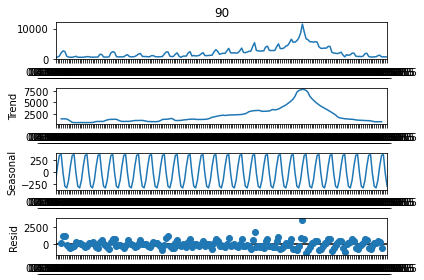

<ipython-input-66-d9996ea5ac42>:65: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposed = seasonal_decompose(comu, model='additive', freq=7)


<Figure size 1440x288 with 0 Axes>

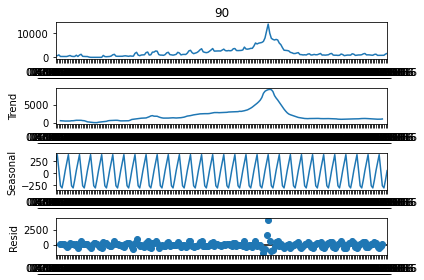

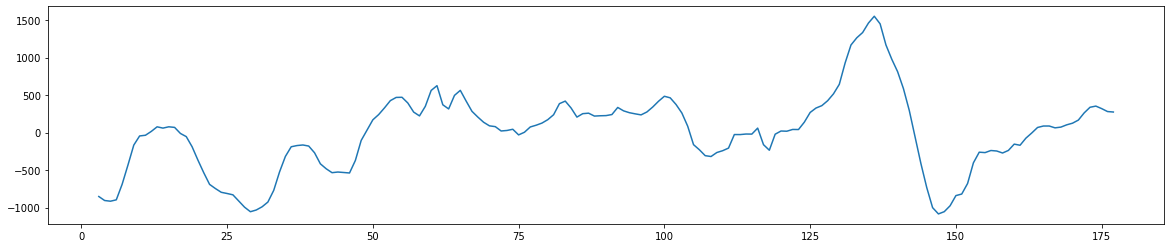

In [66]:
inizio = pd.to_datetime('20150401', format='%Y%m%d')
# Mancano 4 ore nel giorno 2016-08-16
fine = pd.to_datetime('20151031', format='%Y%m%d')
#comune = 'Macerata'
files = []
for i in onlyfiles:
    data = pd.to_datetime(i.split('_')[1])
    if data >= inizio and data <= fine:
        files.append(i)

gg = pd.read_csv(f'{percorso}{cartella}{files[0]}', header=None)
db = gg.groupby(0).mean().reset_index()
db.rename(columns={0: 'Comune', 1: f'{gg.iloc[0, 2][6:8]}_{gg.iloc[0, 2][4:6]}_{gg.iloc[0, 2][0:4]}'}, inplace=True)
for i in range(1, len(files)):
    gg = pd.read_csv(f'{percorso}{cartella}{files[i]}', header=None)
    ciclo = gg.groupby(0).mean().reset_index()
    ciclo.rename(columns={0: 'Comune', 1: f'{gg.iloc[0, 2][6:8]}_{gg.iloc[0, 2][4:6]}_{gg.iloc[0, 2][0:4]}'},
                 inplace=True)

    db = pd.merge(db, ciclo)
df = pd.merge(db, crateri)
cols = df.columns.tolist()
cols = cols[:1] + cols[-1:] + cols[1:-1]
df = df[cols]
comu = df.loc[df.Comune == 'Campotosto']
comu = comu.iloc[0, 2:]
decomposed = seasonal_decompose(comu, model='additive', freq= 7)
plt.figure(figsize=(20, 4))
decomposed.plot()
plt.show()
comu_decomp = pd.DataFrame({'datetime': comu.index, 'observed': comu, 'trend': decomposed.trend, 'seasonal': decomposed.seasonal,'resid': decomposed.resid})

duemilaquindici = comu_decomp.trend
duemilaquindici = duemilaquindici.reset_index()
duemilaquindici.drop(columns='index', inplace=True)

inizio = pd.to_datetime('20160401', format='%Y%m%d')
# Mancano 4 ore nel giorno 2016-08-16
fine = pd.to_datetime('20161031', format='%Y%m%d')
#comune = 'Macerata'
files = []
for i in onlyfiles:
    data = pd.to_datetime(i.split('_')[1])
    if data >= inizio and data <= fine:
        files.append(i)

gg = pd.read_csv(f'{percorso}{cartella}{files[0]}', header=None)
db = gg.groupby(0).mean().reset_index()
db.rename(columns={0: 'Comune', 1: f'{gg.iloc[0, 2][6:8]}_{gg.iloc[0, 2][4:6]}_{gg.iloc[0, 2][0:4]}'}, inplace=True)
for i in range(1, len(files)):
    gg = pd.read_csv(f'{percorso}{cartella}{files[i]}', header=None)
    ciclo = gg.groupby(0).mean().reset_index()
    ciclo.rename(columns={0: 'Comune', 1: f'{gg.iloc[0, 2][6:8]}_{gg.iloc[0, 2][4:6]}_{gg.iloc[0, 2][0:4]}'},
                 inplace=True)

    db = pd.merge(db, ciclo)
df = pd.merge(db, crateri)
cols = df.columns.tolist()
cols = cols[:1] + cols[-1:] + cols[1:-1]
df = df[cols]

comu = df.loc[df.Comune == 'Campotosto']
comu = comu.iloc[0, 2:]

decomposed = seasonal_decompose(comu, model='additive', freq=7)
plt.figure(figsize=(20, 4))
decomposed.plot()
plt.show()
comu_decomp = pd.DataFrame(
    {'datetime': comu.index, 'observed': comu, 'trend': decomposed.trend, 'seasonal': decomposed.seasonal,
     'resid': decomposed.resid})

duemilasedici = comu_decomp.trend
duemilasedici = duemilasedici.reset_index()
duemilasedici.drop(columns='index', inplace=True)
delta = duemilasedici - duemilaquindici
plt.figure(figsize=(20, 4))
plt.plot(delta.index, delta, label = 'trend')
plt.savefig('delta Accumoli.pdf')

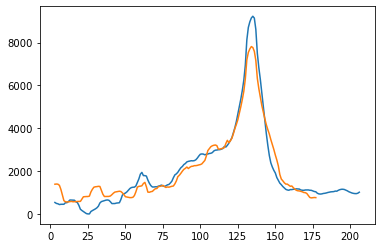

In [69]:
plt.plot(duemilasedici.index, duemilasedici, label = 'duemilasedici')
plt.plot(duemilaquindici.index, duemilaquindici, label = 'duemilaquindici')

In [93]:
percorso = 'D:/Università/Tirocinio/Analisi Dati/Studio Dati/'
#percorso = 'D:/Tirocinio/programmi/Studio Dati/'
onlyfiles = [f for f in listdir(f'{percorso}/risultati_terremoto/') if
             isfile(join(f'{percorso}/risultati_terremoto/', f))]
inizio = pd.to_datetime('20160801', format='%Y%m%d')
# Mancano 4 ore nel giorno 2016-08-16
fine = pd.to_datetime('20160930', format='%Y%m%d')
#comune = 'Macerata'

coms = pd.Series(pd.read_csv('D:/Università/Tirocinio/Analisi Dati/Grezzo Niki/sezione2comuneDEF.csv').comune.unique(), name= 'Comune')
#coms = pd.Series(pd.read_csv('D:/Tirocinio/programmi/Grezzo Niki/sezione2comuneDEF.csv').comune.unique(), name='Comune')
print(coms)
print(coms.iloc[23])  # il comune è None
crateri = pd.read_csv('D:/Università/Tirocinio/Analisi Dati/Studio Dati/crateriCentroIT.csv', sep=';').merge(coms, how='outer').drop(columns='Provincia')
#crateri = pd.read_csv('D:/Tirocinio/programmi/Studio Dati/crateriCentroIT.csv', sep=';').merge(coms, how='outer').drop(
#    columns='Provincia')
crateri['Cratere Centro Italia 2016'].fillna('0', inplace=True)

dfc = pd.read_csv(
    f'{percorso}/risultati_terremoto/CentroItalia_{inizio.strftime("%Y%m%d")}_{inizio.strftime("%Y%m")}30_24.csv',
    header=None)
dfc.rename(columns={0: 'Comune', 1: 'val', 2: 'data'}, inplace=True)

fig = plt.figure(figsize=(14, 10))  # set the spacing between axes.
dfc = dfc.merge(crateri, how='outer')
dfc.rename(columns={'Cratere Centro Italia 2016': 'terremotata'}, inplace=True)
dfc['data'] = pd.to_datetime(dfc['data'], format='%Y%m%d_%H%M')
for i in onlyfiles:
    giorno = pd.to_datetime(i.split('_')[1], format='%Y%m%d')
    if (giorno > inizio) and (giorno <= fine):
        esempio = pd.read_csv(f'{percorso}/risultati_terremoto/{i}', header=None)
        esempio = esempio.drop_duplicates(keep='first')
        esempio.rename(columns={0: 'Comune', 1: 'val', 2: 'data'}, inplace=True)
        esempio = esempio.merge(crateri)
        esempio.rename(columns={'Cratere Centro Italia 2016': 'terremotata'}, inplace=True)
        esempio['data'] = pd.to_datetime(esempio['data'], format='%Y%m%d_%H%M')
        dfc = pd.concat([dfc, esempio])
dfc['data'] = pd.to_datetime(dfc['data'], format='%Y%m%d_%H%M')
dfc.data = dfc.data.dt.date

dfc = dfc.groupby(['data', 'terremotata']).aggregate('val').mean().reset_index()

for i in range(len(dfc['data'])):
    if dfc.iloc[i]['data'] == pd.to_datetime(20150908, format='%Y%m%d'):
        print(i)
        #df_not_hq.iloc[i]['val'] = (df_not_hq.iloc[i-1]['val'] + df_not_hq.iloc[i+1]['val'])/2
        print(dfc.iloc[i - 1]['val'], '+', dfc.iloc[i + 1]['val'])
        dfc['val'][i] = (dfc.iloc[i - 1]['val'] + dfc.iloc[i + 1]['val']) / 2

0                Bibbiena
1      Chiusi della Verna
2              Verghereto
3             Casteldelci
4              Pennabilli
              ...        
658           Sante Marie
659           Roccacasale
660       Montorio Romano
661              Manziana
662                Celano
Name: Comune, Length: 663, dtype: object
None


<Figure size 1008x720 with 0 Axes>

In [94]:
tsedici = dfc.loc[dfc.terremotata == 1.0]
nsedici = dfc.loc[dfc.terremotata != 1.0]

In [86]:
tquindici = dfc.loc[dfc.terremotata == 1.0]
nquindici = dfc.loc[dfc.terremotata != 1.0]

<ipython-input-101-ce7cb1fac88a>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposed = seasonal_decompose(tquindici.val, model='additive', freq=7)
<ipython-input-101-ce7cb1fac88a>:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  dec = seasonal_decompose(tsedici.val, model='additive', freq = 7)


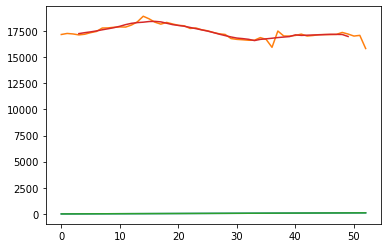

In [101]:
decomposed = seasonal_decompose(tquindici.val, model='additive', freq=7)
q = decomposed.trend.reset_index()
dec = seasonal_decompose(tsedici.val, model='additive', freq = 7)
s = decomposed.observed.reset_index()
plt.plot(s.index,s, label= 'sedici')
plt.plot (q.index,q, label = 'quindici')

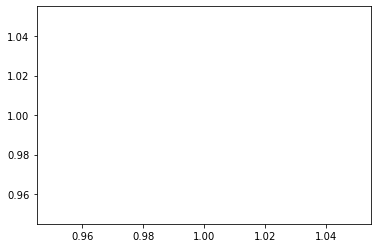

In [103]:
plt.clf()
plt.plot(1,1)